In [3]:
import os
import urllib, cStringIO

import pymongo as pm

import matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

import numpy as np
from __future__ import division
import scipy.stats as stats
import pandas as pd
import json
import re

from PIL import Image
import base64
import json

/Users/megumisano/anaconda/envs/py27/lib/python2.7/site-packages/scipy/spatial/__init__.py:96: ImportWarning: Not importing directory '/Users/megumisano/anaconda/envs/py27/lib/python2.7/site-packages/scipy/spatial/qhull': missing __init__.py
  from .qhull import *
/Users/megumisano/anaconda/envs/py27/lib/python2.7/site-packages/scipy/optimize/_minimize.py:37: ImportWarning: Not importing directory '/Users/megumisano/anaconda/envs/py27/lib/python2.7/site-packages/scipy/optimize/lbfgsb': missing __init__.py
  from .lbfgsb import _minimize_lbfgsb


### load in features and metadata

In [4]:
path_to_feats = '/data2/jefan/chairs1k/features/FEATURES_FC7_chairs1k.npy'
path_to_meta = '/data2/jefan/chairs1k/features/METADATA_chairs1k.csv'

F = np.load(path_to_feats)
M = pd.read_csv(path_to_meta)

assert F.shape[0]==M.shape[0]   

IOError: [Errno 2] No such file or directory: '/data2/jefan/chairs1k/features/FEATURES_FC7_chairs1k.npy'

In [1]:
## clean up M
def clean_up_metadata(M):
    M = M.rename(columns={'label':'path'})    
    label = [i.split('/')[-1] for i in M.path.values]    
    M = M.assign(label=pd.Series(label))
    M = M.drop(columns=['Unnamed: 0'])
    return M
    
M = clean_up_metadata(M) 
M

NameError: name 'M' is not defined

### do some clustering here...

In [55]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [39]:
## apply clustering to organize RDM so that we can see some block diagonal structure
def flatten(x):
    return [item for sublist in x for item in sublist]

## retrieve alpha sorted labels from meta
labels = np.unique(M.label.values)
means = F
af = AffinityPropagation(damping=0.9).fit(means)
labels = af.labels_
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)

ordered_objs = []
# print('Clusters')
for k in range(n_clusters_):
    class_members = labels == k
#     print labels[class_members]
    ordered_objs.append(list(labels[class_members]))
    

ordered_objs = np.array(flatten(ordered_objs))

# define standard order to be used for RDM's across layers
standard_order = ordered_objs

# index for sorting the alphabetical list of labels INTO the order specified by ordered_objs (clustered)
sort_inds = [np.where(labels==ordered_objs[i])[0][0] for i in np.arange(len(ordered_objs))]

Clusters


In [58]:
def get_and_plot_RDM(M,F,sort_inds):
    ## sorted adult RDMs
    labels = M.label.values
    means = F
    ordered_means = means[sort_inds,:]
    sns.set_style('white')
    CORRMAT = np.corrcoef(ordered_means)

    sns.set_context('paper')
    fig = plt.figure(figsize=(30,30))
    plt.matshow(1-CORRMAT, vmin=0, vmax=2)
#     plt.xticks(range(len(ordered_objs)), ordered_objs, rotation=90);
#     plt.yticks(range(len(ordered_objs)), ordered_objs); 
    plt.colorbar()
    for tick in pylab.gca().xaxis.iter_ticks():
        tick[0].label2On = False
        tick[0].label1On = False
        tick[0].label2.set_rotation('vertical')
        tick[0].tick1On = False
        tick[0].tick2On = False
    for tick in pylab.gca().yaxis.iter_ticks():
        tick[0].tick1On = False
        tick[0].tick2On = False  
    RDM = CORRMAT
    plt.gcf().subplots_adjust(left=0.5) 
#     plt.tight_layout()    
#     plt.savefig('./plots/RDM.pdf')
    return RDM

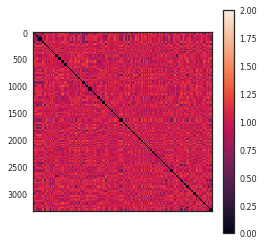

In [59]:
RDM = get_and_plot_RDM(M,F,sort_inds)

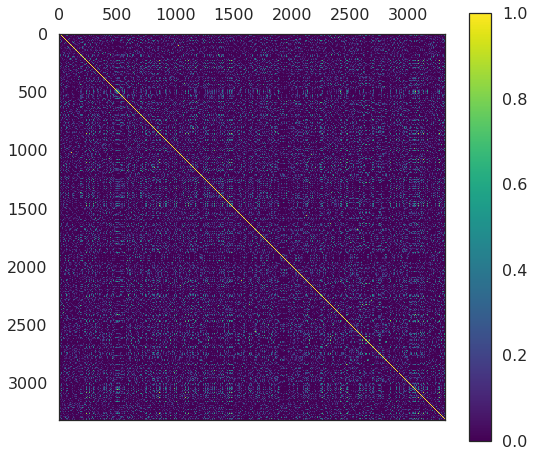

In [29]:
## plot RDM
X = F
corrmat = np.corrcoef(X)
corrmat.shape

from matplotlib import cm
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
cax = ax.matshow(corrmat,vmin=0,vmax=1,cmap=cm.viridis)
# plt.xticks(range(len(X)), order, fontsize=12,rotation='vertical')
# plt.yticks(range(len(X)), order, fontsize=12)
plt.colorbar(cax,shrink=0.8)
plt.tight_layout()